In [75]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})

from src.util import read_json, sma
from config import config

In [127]:
agent_ids = [0]
agent_ids = [str(s) for s in agent_ids]

cases = [6408285]
cases = [str(c) for c in cases]

#agent_type = "ThompsonTabularQFunction"
agent_type = "TabularQFunction"
env = "FrozenLake-v0"
#env = "NChain-v0"

output_dirs = []
for i in range(len(cases)):
    for id_ in agent_ids:
        o = "{}/{}/{}{}/{}".format(config.resultsDir, env, agent_type, cases[i], id_)
        output_dirs.append(o)

In [128]:
print(output_dirs)

['/media/gabriel/Data/projects/distributed_rl/results/FrozenLake-v0/TabularQFunction6408285/0']


In [129]:
rewards = []
for output_dir in output_dirs:
    print(output_dir)
    
    reward_arr = []
    episodes = sorted(os.listdir(output_dir),key=lambda x: int(x))
    print(len(episodes))
    for e in episodes:
        
        d = output_dir + '/' + e
        files = os.listdir(d)

        steps = []
        for f in files:
            fn = d+'/'+f
            j = read_json(fn)
            steps.append(j)
            
        R = np.sum([d['r'] for d in steps])
        reward_arr.append(R)
        
    rewards.append(np.array(reward_arr))

rewards = np.array(rewards)

/media/gabriel/Data/projects/distributed_rl/results/FrozenLake-v0/TabularQFunction6408285/0
5000


In [130]:
print(rewards.shape)
N = rewards.shape[1]*10
x = range(100,N,10)
print(len(x))

(1, 5000)
4990


(5000,)


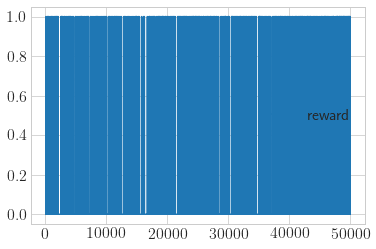

In [131]:
avg_rewards = np.mean(rewards,axis=0)
print(avg_rewards.shape)
plt.figure()
plt.plot(x,avg_rewards[10:],label='reward')
plt.legend()
plt.show()
plt.close()

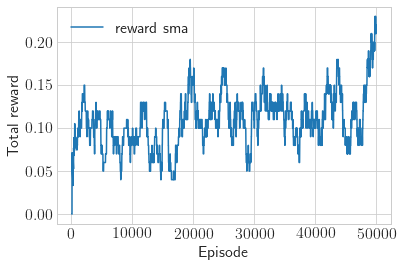

In [132]:
rewards_sma = sma(avg_rewards,100)
plt.figure()
plt.plot(x,rewards_sma[10:],label='reward sma')
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.savefig("{}.{}.{}.pdf".format(agent_type,env,len(agent_ids)), dpi=500)
plt.show()
plt.close()